In [208]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from sqlalchemy import inspect

In [209]:
engine = create_engine("sqlite:///hawaii.sqlite")
insp = inspect(engine)
insp.get_table_names()

['measurement', 'station']

In [210]:
conn = engine.connect()
stationdf = pd.read_sql("select * from station", conn)
measurementdf = pd.read_sql("select * from measurement", conn)

In [310]:
stationdf

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [211]:
measurementdf.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [212]:
base = automap_base()
base.prepare(engine, reflect=True)
basemeasure = base.classes.measurement
basemeasure

sqlalchemy.ext.automap.measurement

In [213]:
base = automap_base()
base.prepare(engine, reflect=True)
basestation = base.classes.station
basestation

sqlalchemy.ext.automap.station

In [214]:
measurementdf["date"].max()

'2017-08-23'

In [282]:
dateprec = session.query(measurement.date, measurement.prcp).filter(measurement.date>'2016-08-23').\
group_by(measurement.date).order_by(measurement.date.desc()).all()


In [283]:
dateprecdf = pd.DataFrame(dateprec)
dateprecdf.rename(columns={0:"Date", 1:"Precipitation"}, inplace = True)
dateprecdf.set_index("Date", inplace = True)
dateprecdf

,Precipitation
Date,
2017-08-23,0.00
2017-08-22,0.00
2017-08-21,0.00
2017-08-20,0.00
2017-08-19,0.00
...,...
2016-08-28,0.01
2016-08-27,0.00
2016-08-26,0.00


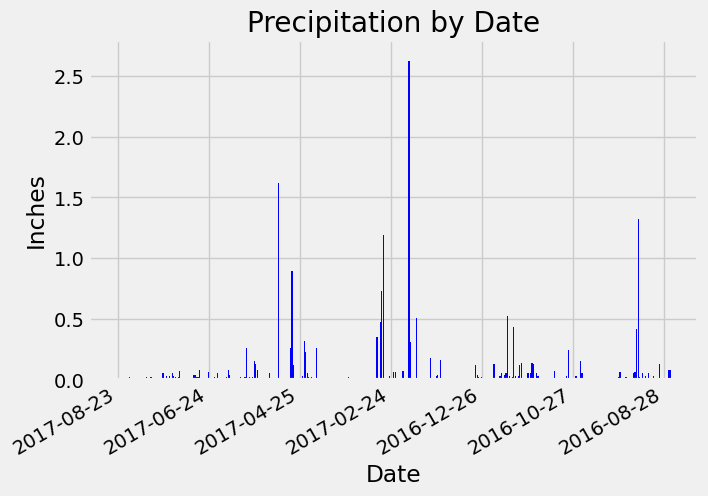

In [315]:
dates = dateprecdf.reset_index()['Date']
prec = dateprecdf['Precipitation']

fig, ax=plt.subplots()
plt.bar(dates,prec,align='center',color = 'blue'),
myLocator = mticker.MultipleLocator(60)
ax.xaxis.set_major_locator(myLocator),
plt.ylabel('Inches'),
plt.xlabel("Date")
plt.title('Precipitation by Date'),
plt.ylim(0,2.8),
fig.autofmt_xdate(),
plt.show()

In [285]:
measurementdf.head()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [286]:
stationtobs = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

stationtobs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [248]:
tobsdf = pd.DataFrame(stationtobs)
tobsdf

,0,1
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [275]:
mostactive = tobsdf[0]
mostactive = mostactive[0]
print(f"the most active station is station", mostactive)

the most active station is station USC00519281


In [274]:
mostactivemin = session.query(func.min(measurement.tobs)).filter(measurement.station == mostactive).all()

mostactivemax = session.query(func.max(measurement.tobs)).filter(measurement.station == mostactive).all()

mostactiveavg = session.query(func.avg(measurement.tobs)).filter(measurement.station == mostactive).all()

print(f"the most active station's min temp is", mostactivemin)
print(f"the most active station's max temp is", mostactivemax)
print(f"the most active station's avg temp is", mostactiveavg)

the most active station's min temp is [(54.0,)]
the most active station's max temp is [(85.0,)]
the most active station's avg temp is [(71.66378066378067,)]


In [305]:
datetemp = session.query(measurement.date,measurement.tobs).filter(measurement.station == mostactive).filter(measurement.date>'2016-08-23').\
group_by(measurement.date).order_by(measurement.date.desc()).all()
datetemp

[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

In [307]:
datetemp = pd.DataFrame(datetemp)
datetemp = datetemp[1]

datetemp

0      79.0
1      76.0
2      76.0
3      77.0
4      77.0
       ... 
346    73.0
347    75.0
348    80.0
349    80.0
350    77.0
Name: 1, Length: 351, dtype: float64

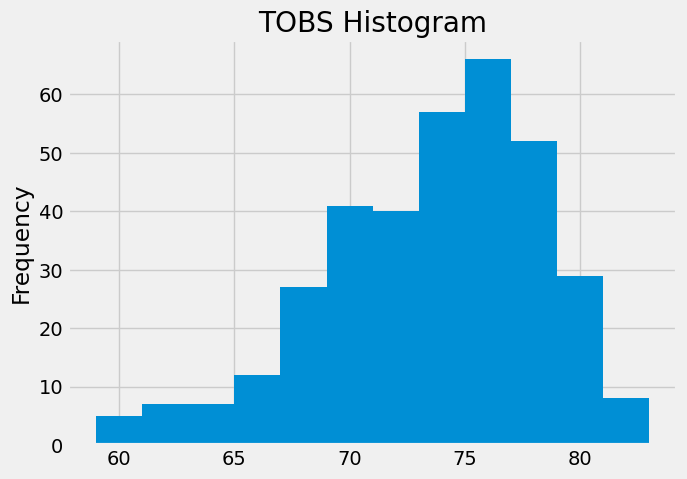

In [309]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
x = datetemp
plt.hist(x, bins=12)
plt.gca().set(title='TOBS Histogram', ylabel='Frequency');